# Elecciones USA 2020

## Datasets

### Cargar características socioeconómicas y demográficas

In [274]:
from tabulate import tabulate
import pandas as pd

# Cargar datos
all_data = pd.read_csv("data/county_complete.csv", header=0, sep=",")

# Seleccionar las primeras tres columnas y las columnas que contienen "2019"
all_data = all_data.iloc[:, [0, 1, 2]].join(all_data.loc[:, all_data.columns.str.contains("2019")])

# Renombrar la tercera columna
all_data.columns.values[2] = "county"

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(all_data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(all_data))

╒════╤════════╤═════════╤════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤══════════════════════════╤════════════════╤══════════════════════════╤══════════════════════════════╤════════════╤════════════════╤═══════

### Cargar los resultados electorales

In [275]:
# Cargar datos
d1 = pd.read_csv("data/2020_US_County_Level_Presidential_Results.csv")

# Crear nueva columna 'votes_others'
d1['votes_others'] = d1['total_votes'] - (d1['votes_gop'] + d1['votes_dem'])

# Crear nueva columna 'perc votes_others'
d1['perc votes_others'] = d1['votes_others'] / d1['total_votes']

# Quedarse con columnas específicas
d1 = d1[['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem', 'total_votes', 'votes_others', 'perc votes_others', 'per_dem', 'per_gop']]

# Renombrar columnas
d1.columns = ["state", "fips", "county", "Trump_2020", "Biden_2020", "Total_2020", "Other_2020", "Perc_Other_2020", "Perc_Biden_2020", "Perc_Trump_2020"]

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(d1.head(), headers='keys', tablefmt='fancy_grid'))
print(len(d1))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│    │ state   │   fips │ county         │   Trump_2020 │   Biden_2020 │   Total_2020 │   Other_2020 │   Perc_Other_2020 │   Perc_Biden_2020 │   Perc_Trump_2020 │
╞════╪═════════╪════════╪════════════════╪══════════════╪══════════════╪══════════════╪══════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│  0 │ Alabama │   1001 │ Autauga County │        19838 │         7503 │        27770 │          429 │        0.0154483  │         0.270184  │          0.714368 │
├────┼─────────┼────────┼────────────────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────────┼───────────────────┼───────────────────┤
│  1 │ Alabama │   1003 │ Baldwin County │        83544 │        24578 │       109679 │         1557 │        0.014196   │         0.22409   │          0.761714 │
├────┼─────────┼──────

### Unir dataset final

In [276]:
# Unir los dos datasets
data = pd.merge(d1, all_data, how='inner', on=["state", "county", "fips"])

# Ensure FIPS codes are strings with 5 characters (padded with leading zeros)
data['fips'] = data['fips'].astype(str).str.zfill(5)


# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(data))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤═══════════════════

## Preprocesado

### Convertir variables categóricas en vectores

In [277]:
# Guardamos las variables en vectores para uso futuro
state_names = data['state']
fips_codes = data['fips']
county_names = data['county']


### Calcular el ganador en cada county

In [278]:
data['Winner_2020'] = data['Perc_Biden_2020'].apply(lambda x: "Biden" if x >= 0.50 else "Trump")

### Eliminar columnas

In [279]:
columns_to_drop = ['state', 'fips', 'county', 'Trump_2020', 'Perc_Trump_2020', 'age_over_85_2019', 'age_under_5_2019', 'households_2019', 'households_speak_asian_or_pac_isl_2019', 'households_speak_other_2019', 'households_speak_other_indo_euro_lang_2019', 'households_speak_spanish_2019', 'household_has_broadband_2019', 'household_has_smartphone_2019', 'household_has_computer_2019', 'housing_mobile_homes_2019', 'housing_one_unit_structures_2019', 'housing_two_unit_structures_2019', 'mean_household_income_2019', 'mean_work_travel_2019', 'median_household_income_2019', 'median_individual_income_2019', 'median_individual_income_age_25plus_2019', 'persons_per_household_2019', 'poverty_65_and_over_2019', 'poverty_under_18_2019', 'uninsured_65_and_older_2019', 'uninsured_under_19_2019', 'uninsured_under_6_2019']  # Nombres de las columnas a eliminar
data = data.drop(columns=columns_to_drop)

### Missing values

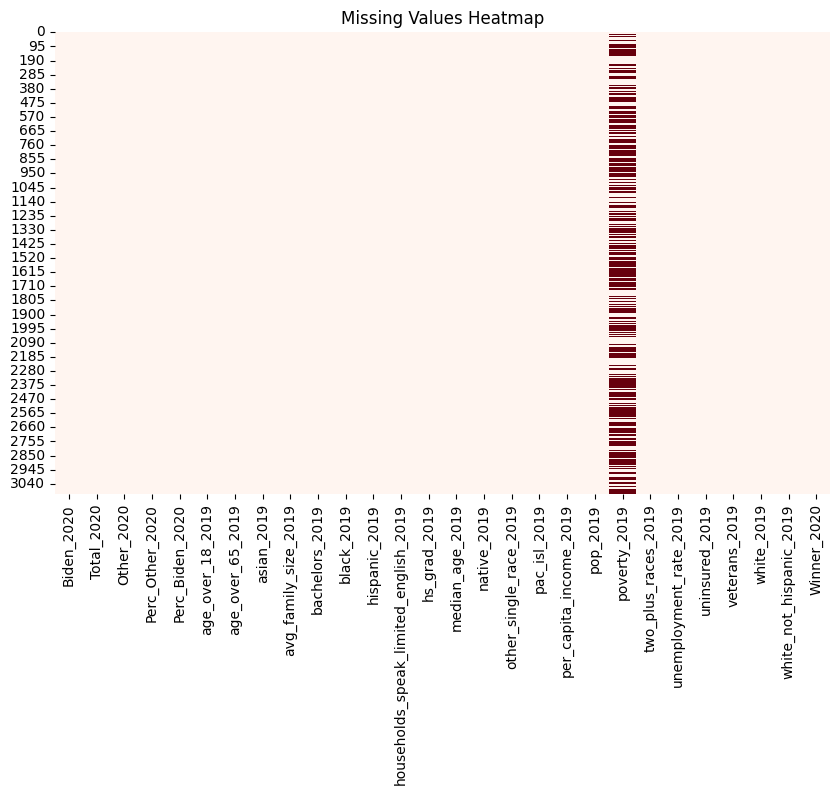

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="Reds")

plt.title("Missing Values Heatmap")
plt.show()

### Eliminar columnas 2

In [281]:
columns_to_drop = ['poverty_2019']  # Nombres de las columnas a eliminar
data = data.drop(columns=columns_to_drop)

### Tabla Final

In [282]:
# Usar tabulate para mostrar las primeras 5 filas en formato de tabla 
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤═════════════════════════════════════════╤════════════════╤═══════════════════╤═══════════════╤══════════════════════════╤════════════════╤══════════════════════════╤════════════╤═══════════════════════╤══════════════════════════╤══════════════════╤═════════════════╤══════════════╤═══════════════════════════╤═══════════════╕
│    │   Biden_2020 │   Total_2020 │   Other_2020 │   Perc_Other_2020 │   Perc_Biden_2020 │   age_over_18_2019 │   age_over_65_2019 │   asian_2019 │   avg_family_size_2019 │   bachelors_2019 │   black_2019 │   hispanic_2019 │   households_speak_limited_english_2019 │   hs_grad_2019 │   median_age_2019 │   native_2019 │   other_single_race_2019 │   pac_isl_2019 │   per_capita_income_2019 │   pop_2019 │   two_plus_races_2019 │   unemployment_rate

### Correlación

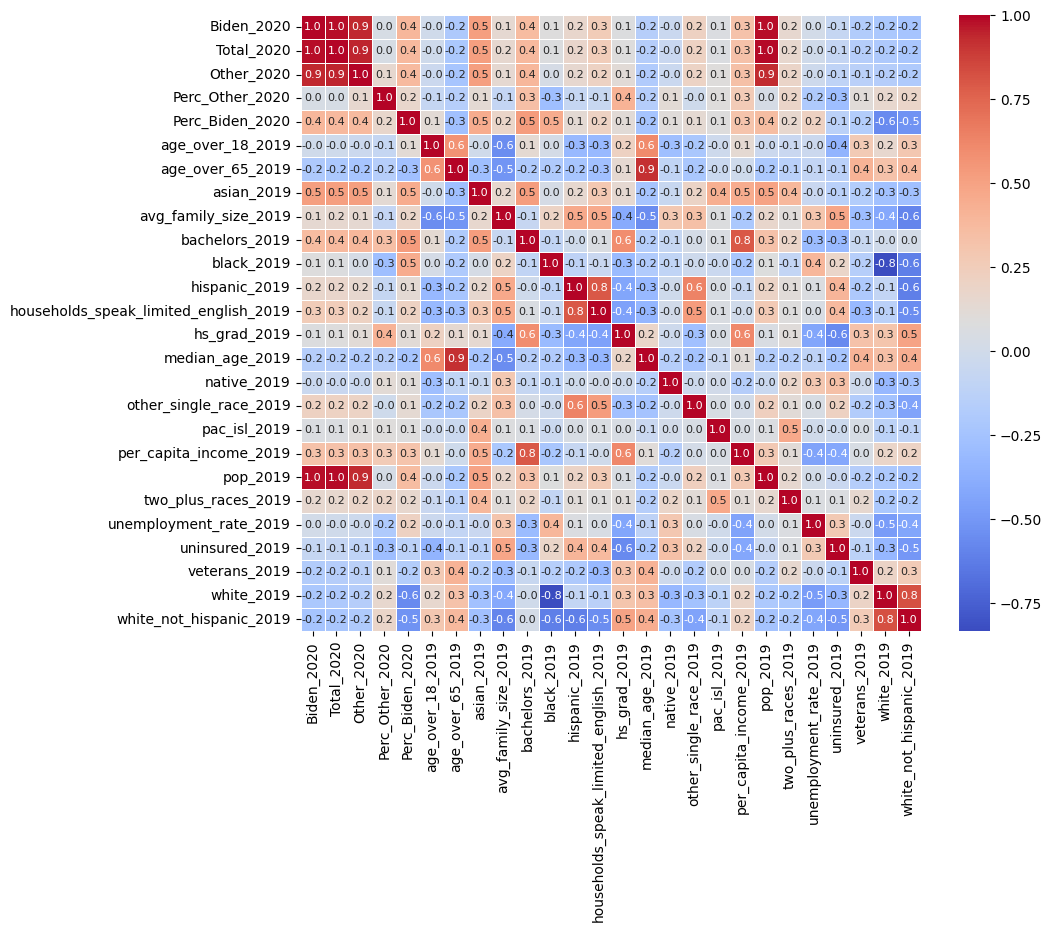

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación sin la variable "Winner_2020"
corr_matrix = data.iloc[:, :-1].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5, annot_kws={"size": 8})

# Mostrar el gráfico
plt.show()


## Aprendizaje No Supervisado

### Dataset

In [59]:
columns_to_drop = ['Winner_2020']  # Nombres de las columnas a eliminar
data_unsupervised = data.drop(columns=columns_to_drop)

### PCA

### Clustering

#### KMeans

## Aprendizaje Supervisado

En esta sección, utilizaremos métodos de aprendizaje supervisado para abordar nuestros problemas de clasificación y regresión. Para la clasificación, aplicaremos Árboles de Decisión, Random Forest, KNN, LDA/QDA, y Naive Bayes, comparando su desempeño. En regresión, emplearemos Regresión Lineal y Regresión Logística, con enfoques de selección de variables hacia adelante y hacia atrás, evaluando la eficacia de cada método en función del problema a resolver.

### Clasificación

#### Dataset

In [60]:
columns_to_drop = ['Biden_2020', 'Total_2020', 'Other_2020', 'Perc_Biden_2020']  # Nombres de las columnas a eliminar
data_class = data.drop(columns=columns_to_drop)

#### Data Splitting

In [85]:
from sklearn.model_selection import train_test_split

# Quitar la columna objetivo ('Biden_2020') del conjunto de datos
X = data_class.drop(columns=["Winner_2020"])  # Características (sin la columna objetivo)
y = data_class["Winner_2020"]  # Columna objetivo

# Dividir los datos en 80% para train y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Benchmark Model

Winner_2020
Trump    0.838316
Biden    0.161684
Name: proportion, dtype: float64


C:\Users\jorge\AppData\Local\Temp\ipykernel_34656\2093265746.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution_percentage.index, y=label_distribution_percentage.values, palette=["#e41a1c","#377eb8"])


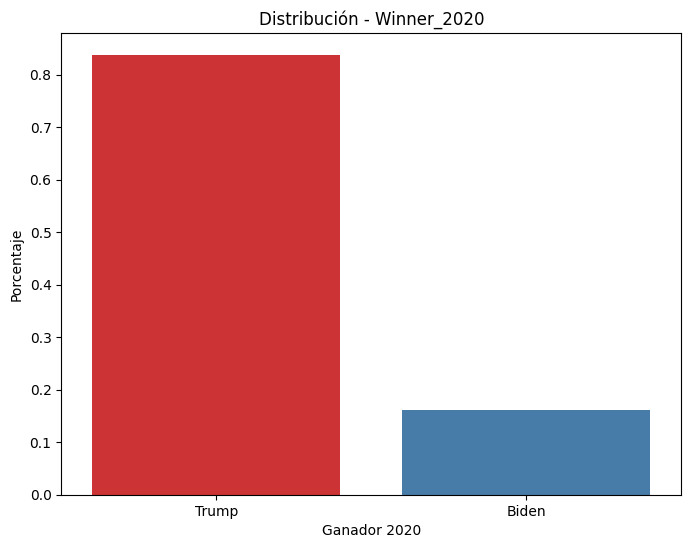

In [86]:
# Obtener la distribución de las etiquetas en porcentaje
label_distribution_percentage = data_class["Winner_2020"].value_counts(normalize=True)

# Imprimir la distribución en porcentaje
print(label_distribution_percentage)

# Graficar la distribución de las etiquetas en porcentaje
plt.figure(figsize=(8, 6))
sns.barplot(x=label_distribution_percentage.index, y=label_distribution_percentage.values, palette=["#e41a1c","#377eb8"])

# Añadir título y etiquetas
plt.title("Distribución - Winner_2020")
plt.xlabel("Ganador 2020")
plt.ylabel("Porcentaje")

# Mostrar el gráfico
plt.show()

#### Decision Trees

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los hiperparámetros que quieres probar en el modelo
param_grid = {
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'criterion': ['gini', 'entropy'],  # Función de evaluación (índice Gini o Entropía)
    'splitter': ['best', 'random']  # Estrategia para elegir los splits
}

# Crear el modelo de Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_clf = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_test_clf_pred = best_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_clf_pred)
print(f"Exactitud en el conjunto de prueba: {test_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_clf_pred))


Mejores parámetros: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Exactitud en el conjunto de prueba: 0.9101123595505618

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.79      0.74      0.76       121
       Trump       0.94      0.95      0.94       502

    accuracy                           0.91       623
   macro avg       0.86      0.84      0.85       623
weighted avg       0.91      0.91      0.91       623



##### Gráficos

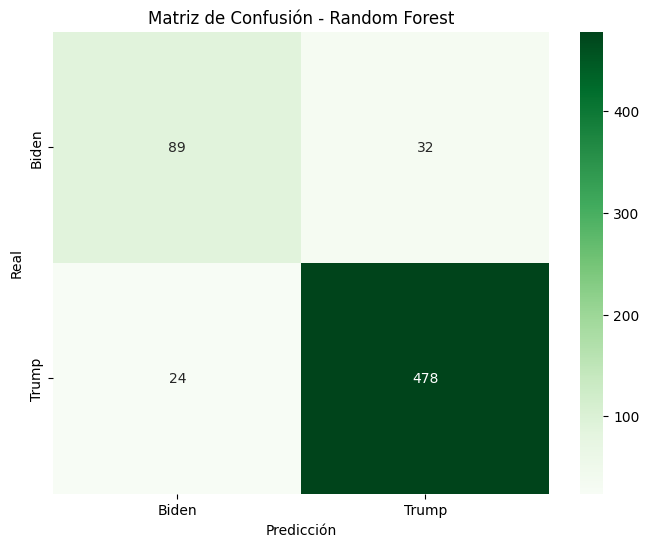

In [121]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_clf_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

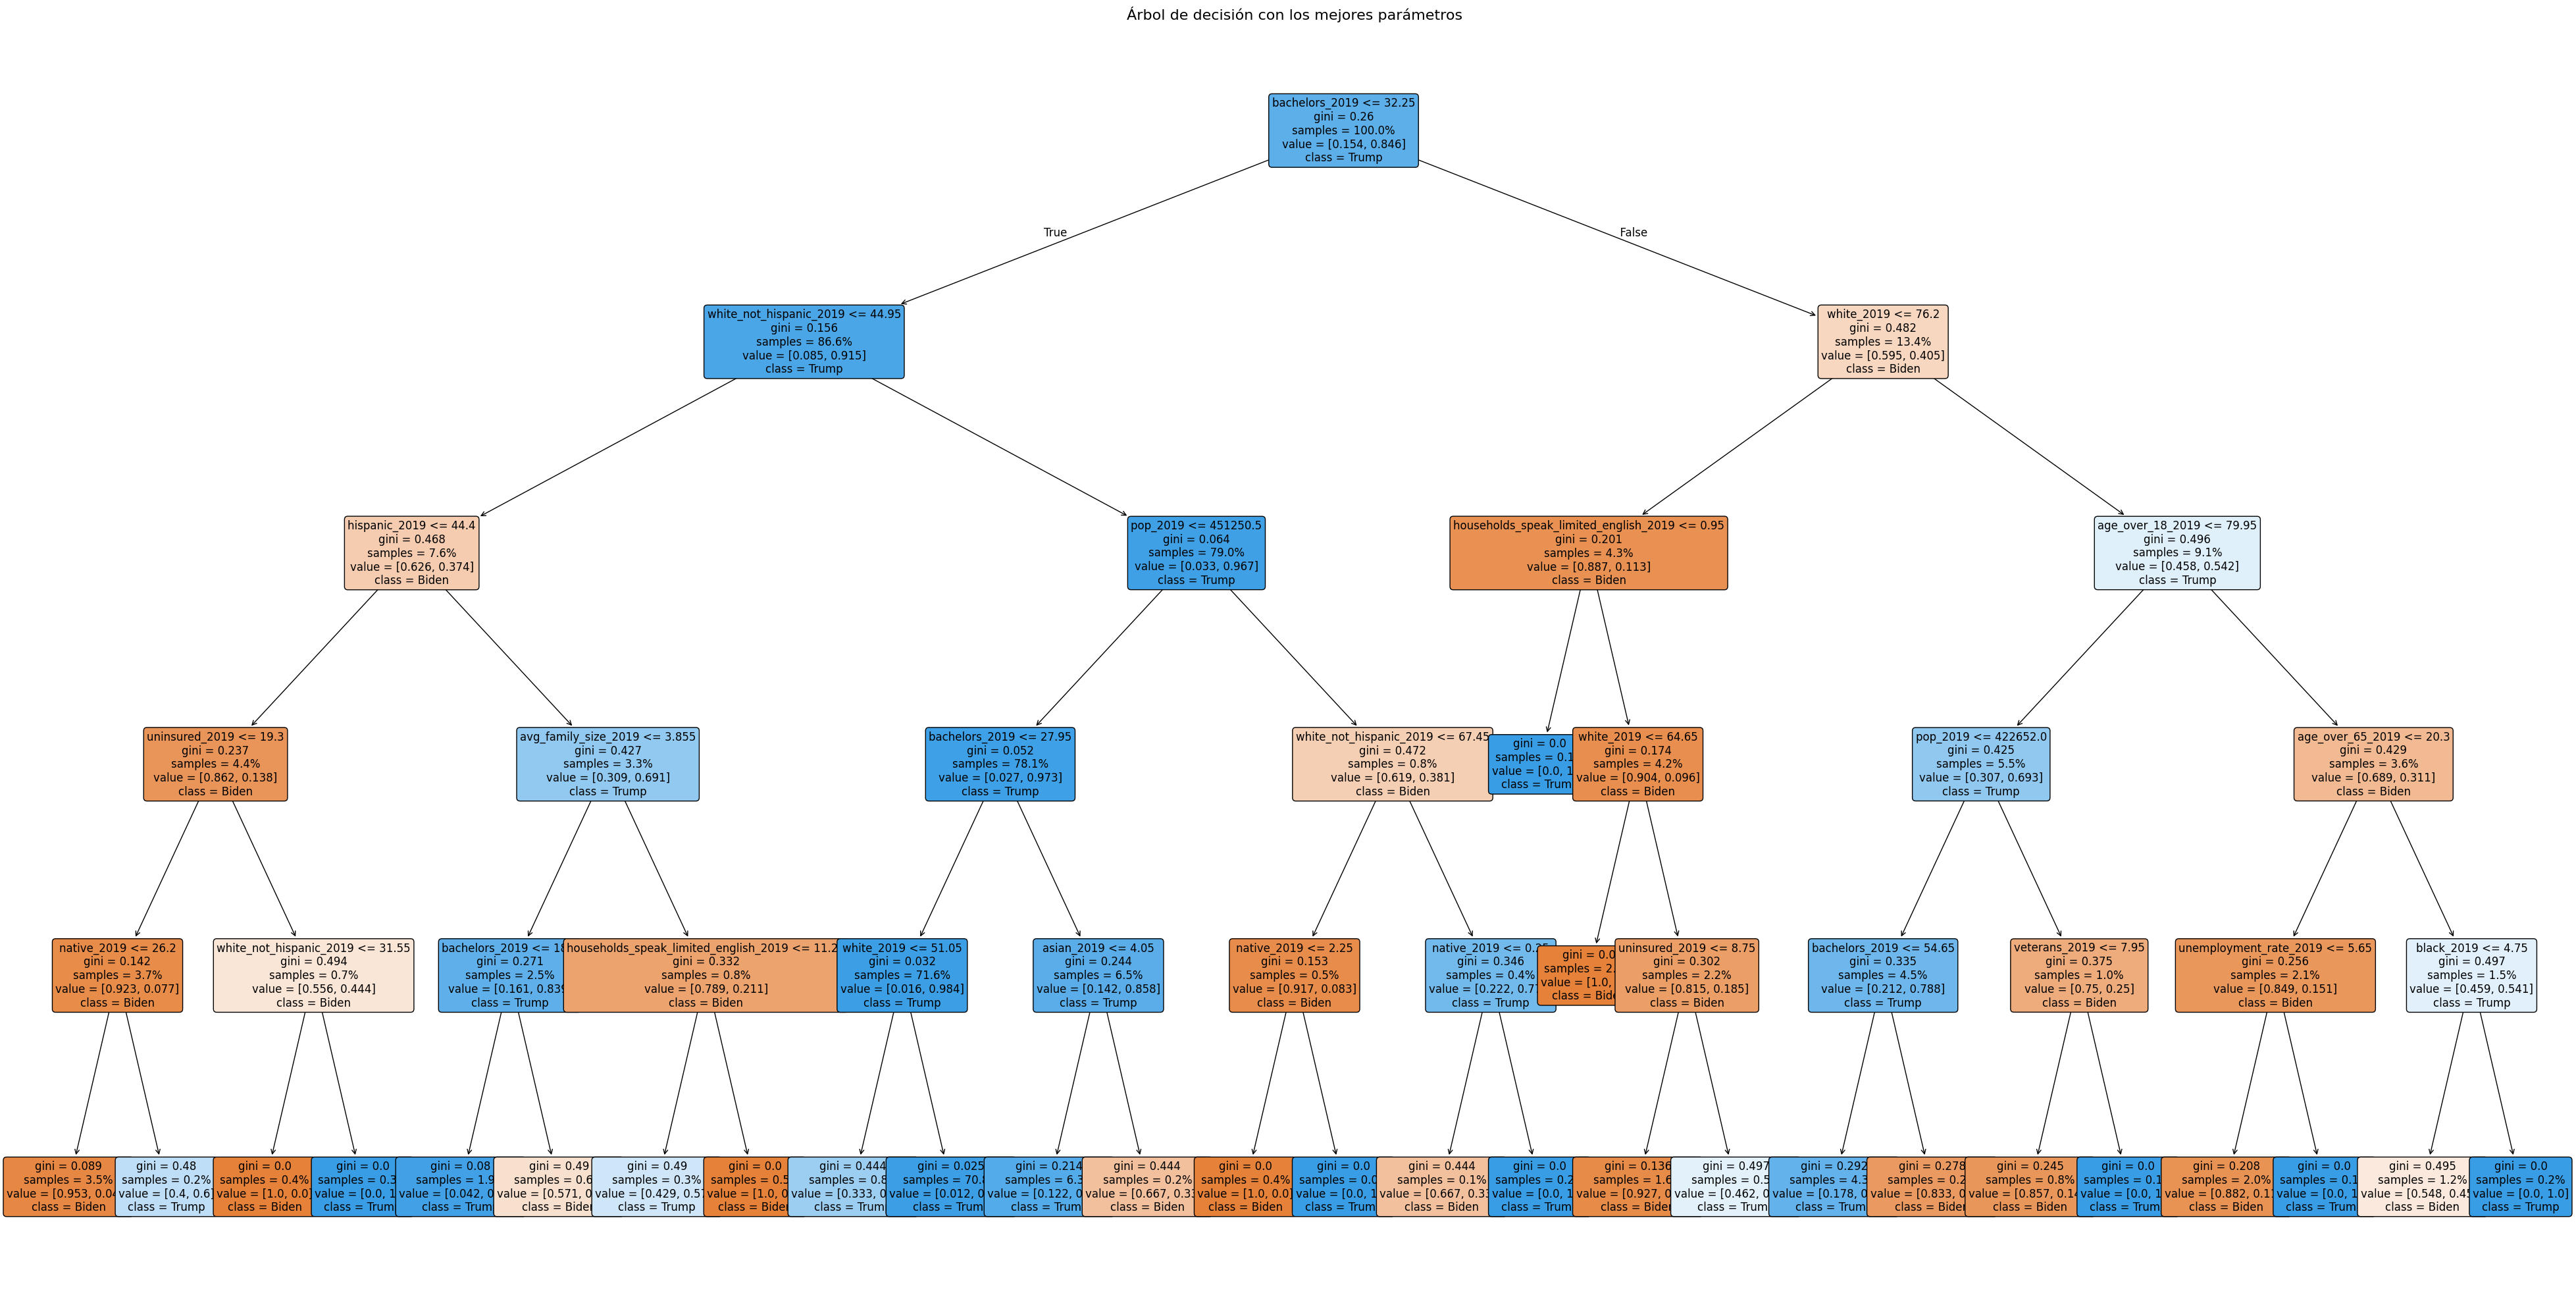

In [114]:
from sklearn import tree

# Ajustar el tamaño del gráfico para visualizar bien el árbol
plt.figure(figsize=(50, 25))

# Visualizar el árbol de decisión con los mejores parámetros
tree.plot_tree(
    best_clf, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in best_clf.classes_],  # Convertir las clases a string si son enteros
    filled=True,   # Rellenar los nodos con colores basados en la clase
    rounded=True,  # Nodos con bordes redondeados
    fontsize=12,   # Tamaño de fuente
    proportion=True  # Escalar los nodos en proporción al número de muestras
)

# Añadir un título al gráfico
plt.title("Árbol de decisión con los mejores parámetros", fontsize=16)

# Mostrar el gráfico
plt.show()


#### Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'criterion': ['gini', 'entropy'],  # Función de evaluación (índice Gini o Entropía)
    'bootstrap': [True, False]  # Si se utiliza bootstrap para muestreo
}

# Crear el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_rf.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_rf.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_rf_clf = random_search_rf.best_estimator_

# Predecir en el conjunto de prueba
y_test_rf_pred = best_rf_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_rf_accuracy = accuracy_score(y_test, y_test_rf_pred)
print(f"Exactitud en el conjunto de prueba: {test_rf_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_rf_pred))


Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Exactitud en el conjunto de prueba: 0.9325842696629213

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.92      0.71      0.80       121
       Trump       0.93      0.99      0.96       502

    accuracy                           0.93       623
   macro avg       0.93      0.85      0.88       623
weighted avg       0.93      0.93      0.93       623



##### Gráficos

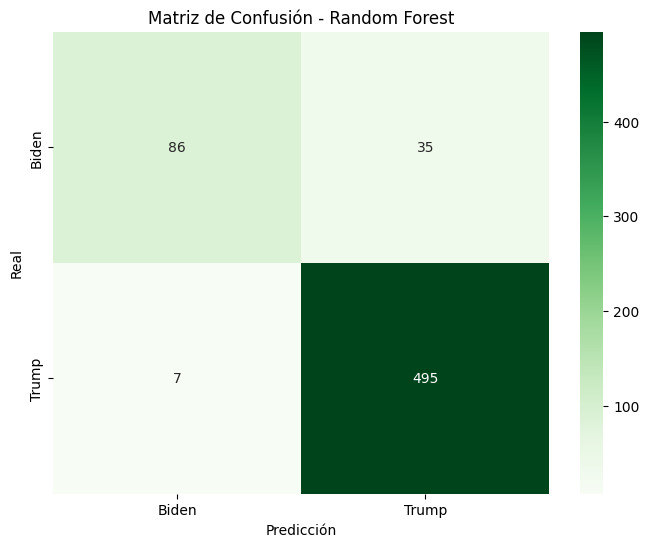

In [119]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_rf_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=best_rf_clf.classes_, yticklabels=best_rf_clf.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los hiperparámetros para KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métricas de distancia
}

# Crear el modelo de KNN
knn_clf = KNeighborsClassifier()

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_knn = RandomizedSearchCV(estimator=knn_clf, param_distributions=param_grid_knn, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_knn.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_knn.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_knn_clf = random_search_knn.best_estimator_

# Predecir en el conjunto de prueba
y_test_knn_pred = best_knn_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_knn_accuracy = accuracy_score(y_test, y_test_knn_pred)
print(f"Exactitud en el conjunto de prueba: {test_knn_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_knn_pred))


c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.



Mejores parámetros: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Exactitud en el conjunto de prueba: 0.8314606741573034

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.61      0.36      0.46       121
       Trump       0.86      0.94      0.90       502

    accuracy                           0.83       623
   macro avg       0.74      0.65      0.68       623
weighted avg       0.81      0.83      0.81       623



##### Gráficos

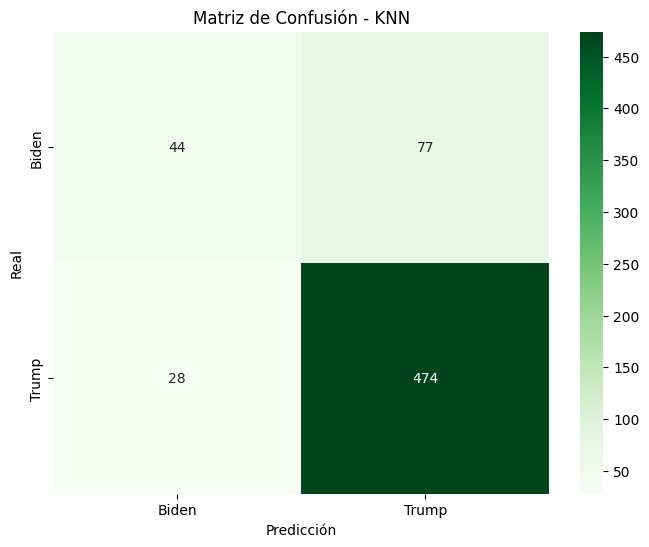

In [130]:
# Generar la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_test_knn_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens', xticklabels=best_knn_clf.classes_, yticklabels=best_knn_clf.classes_)
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### Análisis Discriminante

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el número de clases menos uno
n_classes = len(y_train.unique())
max_components = min(X_train.shape[1], n_classes - 1)

# Definir los hiperparámetros para LDA
param_grid_lda = {
    'solver': ['lsqr', 'eigen'],  # Algoritmos de solución (evitamos 'svd' ya que no admite shrinkage)
    'shrinkage': [None, 'auto'],  # Regularización por shrinkage
    'n_components': [None] + list(range(1, max_components + 1))  # Número de componentes a mantener
}

# Crear el modelo de LDA (Linear Discriminant Analysis)
lda_clf = LinearDiscriminantAnalysis()

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_lda = RandomizedSearchCV(estimator=lda_clf, param_distributions=param_grid_lda, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_lda.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_lda.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_lda_clf = random_search_lda.best_estimator_

# Predecir en el conjunto de prueba
y_test_lda_pred = best_lda_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_lda_accuracy = accuracy_score(y_test, y_test_lda_pred)
print(f"Exactitud en el conjunto de prueba: {test_lda_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_lda_pred))

Mejores parámetros: {'solver': 'lsqr', 'shrinkage': None, 'n_components': None}
Exactitud en el conjunto de prueba: 0.913322632423756

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.86      0.66      0.75       121
       Trump       0.92      0.97      0.95       502

    accuracy                           0.91       623
   macro avg       0.89      0.82      0.85       623
weighted avg       0.91      0.91      0.91       623



c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.



##### Gráficos

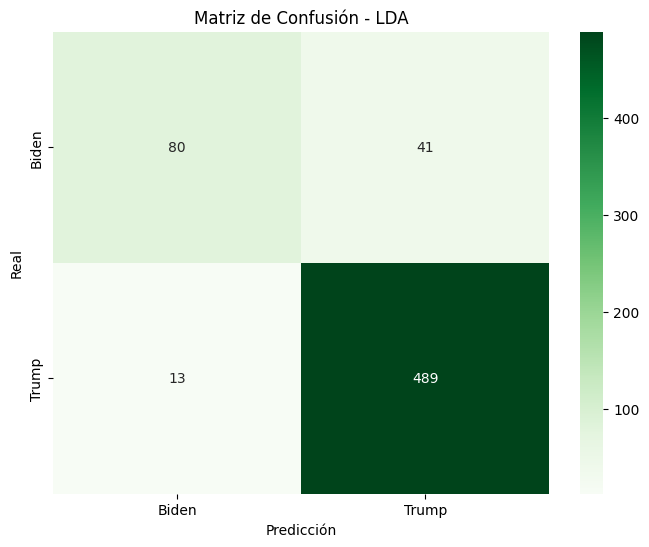

In [136]:
# Generar la matriz de confusión
conf_matrix_lda = confusion_matrix(y_test, y_test_lda_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Greens', xticklabels=best_lda_clf.classes_, yticklabels=best_lda_clf.classes_)
plt.title('Matriz de Confusión - LDA')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### Naïve Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# No hay muchos hiperparámetros ajustables para GaussianNB, solo 'var_smoothing'
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Ajuste de varianza para la estabilidad numérica
}

# Crear el modelo de Gaussian Naive Bayes
nb_clf = GaussianNB()

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_nb = RandomizedSearchCV(estimator=nb_clf, param_distributions=param_grid_nb, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_nb.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_nb.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_nb_clf = random_search_nb.best_estimator_

# Predecir en el conjunto de prueba
y_test_nb_pred = best_nb_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_nb_accuracy = accuracy_score(y_test, y_test_nb_pred)
print(f"Exactitud en el conjunto de prueba: {test_nb_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_nb_pred))

Mejores parámetros: {'var_smoothing': 1e-09}
Exactitud en el conjunto de prueba: 0.8860353130016051

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.75      0.63      0.68       121
       Trump       0.91      0.95      0.93       502

    accuracy                           0.89       623
   macro avg       0.83      0.79      0.81       623
weighted avg       0.88      0.89      0.88       623



c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.



##### Gráficos

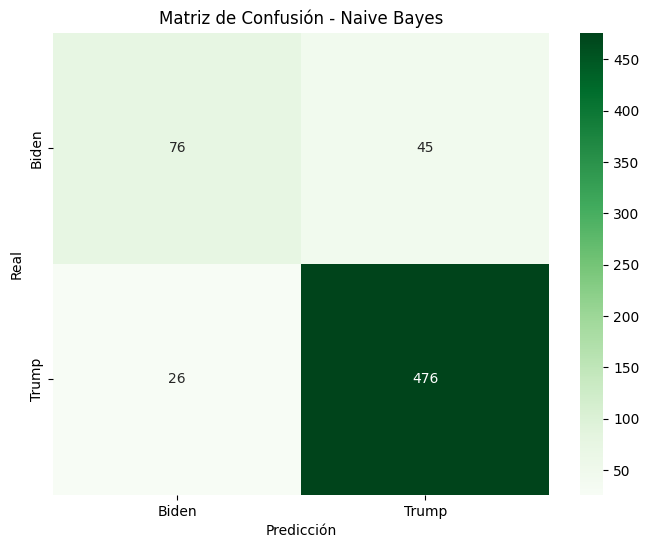

In [139]:
# Generar la matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_test_nb_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Greens', xticklabels=best_nb_clf.classes_, yticklabels=best_nb_clf.classes_)
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


#### Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los hiperparámetros para Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Tipos de regularización
    'C': [0.01, 0.1, 1, 10, 100],  # Inverso de la regularización
    'solver': ['liblinear', 'saga'],  # Solvers compatibles con regularización l1, l2, elasticnet
    'l1_ratio': [0.1, 0.5, 0.7],  # Se usa solo cuando penalty es elasticnet
    'max_iter': [100, 200, 500]  # Número máximo de iteraciones
}

# Crear el modelo de Logistic Regression
lr_clf = LogisticRegression(random_state=42)

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_lr = RandomizedSearchCV(estimator=lr_clf, param_distributions=param_grid_lr, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_lr.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_lr.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_lr_clf = random_search_lr.best_estimator_

# Predecir en el conjunto de prueba
y_test_lr_pred = best_lr_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_lr_accuracy = accuracy_score(y_test, y_test_lr_pred)
print(f"Exactitud en el conjunto de prueba: {test_lr_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_lr_pred))

Mejores parámetros: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'l1_ratio': 0.7, 'C': 0.1}
Exactitud en el conjunto de prueba: 0.9085072231139647

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.83      0.66      0.74       121
       Trump       0.92      0.97      0.94       502

    accuracy                           0.91       623
   macro avg       0.88      0.81      0.84       623
weighted avg       0.90      0.91      0.90       623



c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


45 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, 

##### Gráficos

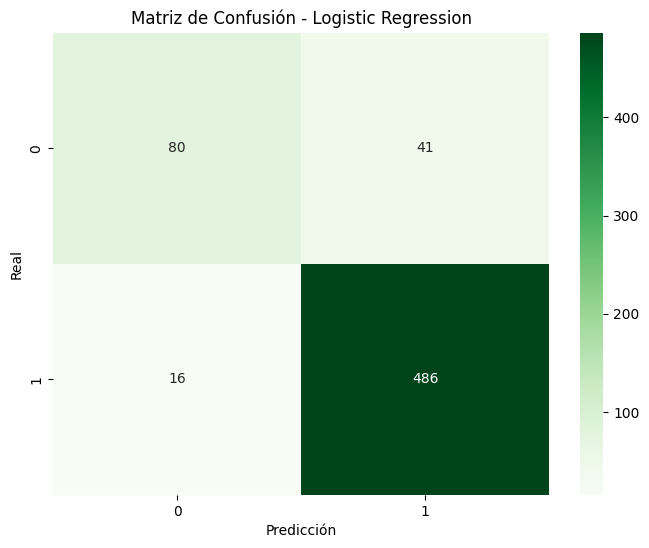

In [146]:
# Generar la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_test_lr_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Logistic Regression')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### Resultados

##### Train

- Mapa con los datos de entrenamiento

In [184]:
import plotly.express as px
import pandas as pd


# Crear un nuevo DataFrame
train_df = pd.DataFrame({
    'fips': fips_codes[X_train.index],
    'county': county_names[X_train.index], 
    'real': y_train 
})

# Añadir una columna de colores: ["#e41a1c","#377eb8"] si predicciones es "Biden"
train_df['color'] = train_df['real'].apply(lambda x: "#377eb8" if x == "Trump" else "#e41a1c")



# Crear un mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=train_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='real',
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden": "#377eb8",
                        "Trump": "#e41a1c"
                    }, 
                    labels={'real': 'Real'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Datos de entrenamiento",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


##### Test

- Mapa con las predicciones

In [179]:
import plotly.express as px
import pandas as pd


# Crear un nuevo DataFrame con las predicciones y el FIPS
predicciones_df = pd.DataFrame({
    'fips': fips_codes[X_test.index],  # Filtrar los FIPS usando los mismos índices que 'X_test'
    'county': county_names[X_test.index],  # Filtrar los county_names usando los mismos índices que 'X_test'
    'predicciones': y_test_rf_pred  # Predicciones del modelo de Logistic Regression
})

# Añadir una columna de colores: ["#e41a1c","#377eb8"] si predicciones es "Biden"
predicciones_df['color'] = predicciones_df['predicciones'].apply(lambda x: "#377eb8" if x == "Trump" else "#e41a1c")



# Crear un mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=predicciones_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='predicciones',
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden": "#377eb8",
                        "Trump": "#e41a1c"
                    }, 
                    labels={'predicciones': 'Predicciones'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Predicciones del modelo - Random Forest",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


- Mapa con datos reales

In [183]:
import plotly.express as px
import pandas as pd


# Crear un nuevo DataFrame con las predicciones y el FIPS
real_df = pd.DataFrame({
    'fips': fips_codes[X_test.index],  # Filtrar los FIPS usando los mismos índices que 'X_test'
    'county': county_names[X_test.index],  # Filtrar los county_names usando los mismos índices que 'X_test'
    'real': y_test  # Predicciones del modelo de Logistic Regression
})

# Añadir una columna de colores: ["#e41a1c","#377eb8"] si predicciones es "Biden"
real_df['color'] = real_df['real'].apply(lambda x: "#377eb8" if x == "Trump" else "#e41a1c")



# Crear un mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=real_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='real',
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden": "#377eb8",
                        "Trump": "#e41a1c"
                    }, 
                    labels={'real': 'Real'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Datos reales",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


- Comparativa Predicción vs Real

In [182]:
import plotly.express as px
import pandas as pd

# Crear un nuevo DataFrame con las predicciones, valores reales y FIPS
comparacion_df = pd.DataFrame({
    'fips': fips_codes[X_test.index],  # Filtrar los FIPS usando los mismos índices que 'X_test'
    'county': county_names[X_test.index],  # Filtrar los county_names usando los mismos índices que 'X_test'
    'predicciones': y_test_rf_pred,  # Predicciones del modelo de Logistic Regression
    'real': y_test  # Valores reales
})

# Añadir una columna de etiquetas:
# "Biden_correcto", "Trump_correcto" o "Error" según las comparaciones
comparacion_df['resultado'] = comparacion_df.apply(
    lambda row: "Biden Correcto" if row['predicciones'] == "Biden" and row['real'] == "Biden"
                else "Trump Correcto" if row['predicciones'] == "Trump" and row['real'] == "Trump"
                else "Error",  # Etiqueta para las diferencias
    axis=1
)

# Crear el mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=comparacion_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='resultado',  # Usar las etiquetas para colorear
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden Correcto": "#377eb8",  # Azul para predicción correcta de Biden
                        "Trump Correcto": "#e41a1c",  # Rojo para predicción correcta de Trump
                        "Error": "#c6c654"  # Dorado para errores de predicción
                    }, 
                    labels={'resultado': 'Comparación'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Comparación de Predicciones vs Datos Reales - Random Forest",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


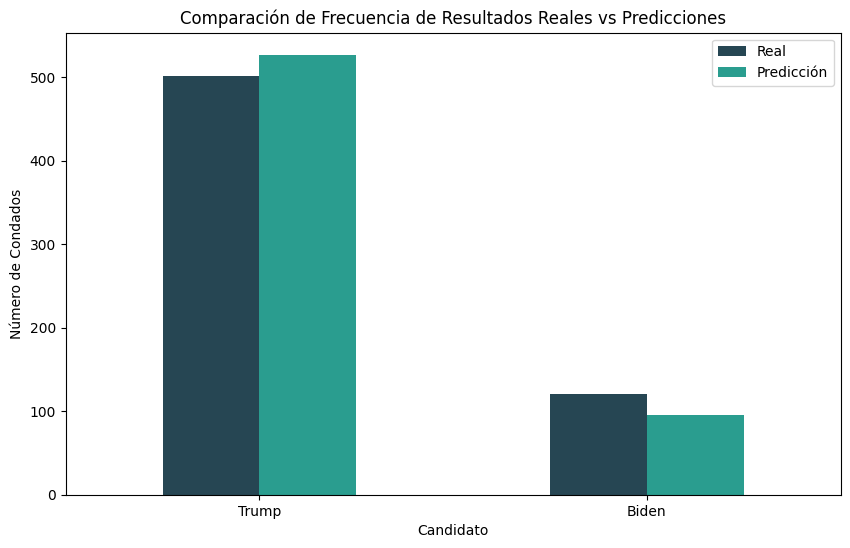

In [197]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con las frecuencias de los valores reales y las predicciones
real_counts = pd.Series(y_test).value_counts()
pred_counts = pd.Series(y_test_lr_pred).value_counts()

# Combinar los resultados en un DataFrame
comparison_df = pd.DataFrame({'Real': real_counts, 'Predicción': pred_counts})

# Crear un gráfico de barras
comparison_df.plot(kind='bar', figsize=(10, 6), color=['#264653', '#2a9d8f'])
plt.title("Comparación de Frecuencia de Resultados Reales vs Predicciones")
plt.xlabel("Candidato")
plt.ylabel("Número de Condados")
plt.xticks(rotation=0)
plt.show()


### Regresión

#### Dataset

In [203]:
columns_to_drop = ['Total_2020', 'Other_2020', 'Winner_2020', "Biden_2020"]  # Nombres de las columnas a eliminar
data_reg = data.drop(columns=columns_to_drop)
data_reg.head()

,Perc_Biden_2020,age_over_18_2019,age_over_65_2019,asian_2019,avg_family_size_2019,bachelors_2019,black_2019,hispanic_2019,households_speak_limited_english_2019,hs_grad_2019,...,other_single_race_2019,pac_isl_2019,per_capita_income_2019,pop_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,0.270184,76.2,15.0,1.0,3.09,26.6,19.0,2.8,0.7,88.5,...,0.7,0.0,29819,55380,2.2,3.5,7.1,12.6,76.8,74.6
1,0.224090,78.3,20.0,0.9,3.24,31.9,9.3,4.6,1.2,90.8,...,1.1,0.0,32626,212830,1.7,4.0,8.9,11.8,86.2,83.1
2,0.457882,79.1,18.6,0.5,3.01,11.6,47.6,4.4,1.6,73.2,...,3.6,0.0,18473,25361,1.2,9.4,11.3,6.6,46.8,45.8
3,0.206983,79.4,15.9,0.1,3.74,10.4,22.3,2.6,0.6,79.1,...,0.0,0.0,20778,22493,0.6,7.0,10.7,8.0,76.8,74.5
4,0.095694,76.8,17.9,0.4,3.33,13.1,1.6,9.3,1.8,80.5,...,0.9,0.0,24747,57681,1.6,3.1,10.8,7.7,95.5,86.9


#### Data Splitting

In [204]:
from sklearn.model_selection import train_test_split

# Quitar la columna objetivo ('Perc_Biden_2020') del conjunto de datos
X = data_reg.drop(columns=["Perc_Biden_2020"])  # Características (sin la columna objetivo)
y = data_reg["Perc_Biden_2020"]  # Columna objetivo

# Dividir los datos en 80% para train y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Benchmark Model

#### Linear Regression

#### Logistic Regression

## Nivel County a Estatal

In [252]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el objeto de validación cruzada repetida (5 splits, 10 repeticiones)
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=10)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Evaluar el modelo usando validación cruzada sin ajustar explícitamente el modelo
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
mse_scores = -scores

# Mostrar los resultados de validación cruzada
print(f'MSE Scores (cross-validation): {mse_scores}')
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Standard Deviation: {mse_scores.std()}')

# Ajustar el modelo con todo el conjunto de entrenamiento para ver los coeficientes
model.fit(X_train, y_train)

# Obtener los coeficientes del modelo ajustado
coefficients = model.coef_
intercept = model.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo:", coefficients)
print("Intercepto del modelo:", intercept)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular MSE y R² en el conjunto de prueba
test_mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Test MSE: {test_mse}')
print(f'R^2: {r_squared}')


MSE Scores (cross-validation): [0.00740801 0.00725805 0.00637418 0.00780473 0.00634471 0.00696242
 0.00659843 0.00650255 0.00751172 0.00698986 0.00713421 0.00751474
 0.00609118 0.00710428 0.00704038 0.00651829 0.00699146 0.00760944
 0.00724558 0.00658007 0.00737891 0.00749721 0.00631999 0.00707665
 0.00674811 0.00642751 0.00693809 0.00670809 0.00757589 0.00720547
 0.0065303  0.00799195 0.00685797 0.00678611 0.0065712  0.00733651
 0.00730384 0.00678513 0.00688009 0.00636302 0.00636492 0.00678109
 0.00707774 0.00776512 0.00695819 0.00666158 0.0068277  0.0069999
 0.00695731 0.00738236]
Mean MSE: 0.0069728446321050234
Standard Deviation: 0.00043530779971983133
Coeficientes del modelo: [ 1.00512247e-02 -4.73468061e-03  4.82798878e-02 -4.78093000e-03
  6.18605333e-03  5.16113824e-02  5.45849942e-04  1.01045614e-02
  2.40430511e-03  1.16375761e-03  5.29538742e-02  4.66348751e-02
  6.10378580e-02  5.33721790e-07  2.55905081e-08  4.59833990e-02
  8.31275876e-03 -8.43272507e-03 -1.46576512e-03  

In [253]:
# Duplicar datos
data_state = data.copy()

# Añadir state, fips, county
data_state["state"] = state_names
data_state["fips"] = fips_codes
data_state["county"] = county_names

# Mantener los valores reales de Perc_Biden_2020
data_state["Predictions Perc_Biden_2020"] = data_state["Perc_Biden_2020"]

# Reemplazar con las predicciones en los índices de X_test
data_state.loc[X_test.index, "Predictions Perc_Biden_2020"] = y_pred

# Convertir el porcentaje restante para Trump
data_state["Predictions Perc_Trump_2020"] = (1 - data_state["Predictions Perc_Biden_2020"] - data_state["Perc_Other_2020"])

# Convertir porcentajes en número de votos
data_state["Votes_Biden_2020"] = data_state["Predictions Perc_Biden_2020"] * data_state["Total_2020"]
data_state["Votes_Trump_2020"] = data_state["Predictions Perc_Trump_2020"] * data_state["Total_2020"]

# Crear total de votos
data_state["Votes_Total_2020"] = data_state["Votes_Biden_2020"] + data_state["Votes_Trump_2020"]


# Agrupar por estado y sumar los votos
data_state_grouped = data_state.groupby("state").agg({
    "Votes_Biden_2020": "sum",  # Sumar los votos de Biden por estado
    "Votes_Trump_2020": "sum",  # Sumar los votos de Trump por estado
    "Votes_Total_2020": "sum" # Sumar los votos totales por estado
}).reset_index()

# Calcular porcentaje de cada candidato en el estado
data_state_grouped["Perc_Biden_2020"] = data_state_grouped["Votes_Biden_2020"] / data_state_grouped["Votes_Total_2020"]
data_state_grouped["Perc_Trump_2020"] = data_state_grouped["Votes_Trump_2020"] / data_state_grouped["Votes_Total_2020"]

# Calcular ganador en cada estado
data_state_grouped["Winner_2020"] = data_state_grouped['Perc_Biden_2020'].apply(lambda x: "Biden" if x >= 0.50 else "Trump")

In [ ]:
def county_to_state(data, y_pred):
    # Duplicar datos
    data_state = data.copy()

    # Añadir state, fips, county
    data_state["state"] = state_names
    data_state["fips"] = fips_codes
    data_state["county"] = county_names

    # Mantener los valores reales de Perc_Biden_2020
    data_state["Predictions Perc_Biden_2020"] = data_state["Perc_Biden_2020"]

    # Reemplazar con las predicciones en los índices de X_test
    data_state.loc[X_test.index, "Predictions Perc_Biden_2020"] = y_pred

    # Convertir el porcentaje restante para Trump
    data_state["Predictions Perc_Trump_2020"] = (1 - data_state["Predictions Perc_Biden_2020"] - data_state["Perc_Other_2020"])

    # Convertir porcentajes en número de votos
    data_state["Votes_Biden_2020"] = data_state["Predictions Perc_Biden_2020"] * data_state["Total_2020"]
    data_state["Votes_Trump_2020"] = data_state["Predictions Perc_Trump_2020"] * data_state["Total_2020"]

    # Crear total de votos
    data_state["Votes_Total_2020"] = data_state["Votes_Biden_2020"] + data_state["Votes_Trump_2020"]


    # Agrupar por estado y sumar los votos
    data_state_grouped = data_state.groupby("state").agg({
        "Votes_Biden_2020": "sum",  # Sumar los votos de Biden por estado
        "Votes_Trump_2020": "sum",  # Sumar los votos de Trump por estado
        "Votes_Total_2020": "sum" # Sumar los votos totales por estado
    }).reset_index()

    # Calcular porcentaje de cada candidato en el estado
    data_state_grouped["Perc_Biden_2020"] = data_state_grouped["Votes_Biden_2020"] / data_state_grouped["Votes_Total_2020"]
    data_state_grouped["Perc_Trump_2020"] = data_state_grouped["Votes_Trump_2020"] / data_state_grouped["Votes_Total_2020"]

    # Calcular ganador en cada estado
    data_state_grouped["Winner_2020"] = data_state_grouped['Perc_Biden_2020'].apply(lambda x: "Biden" if x >= 0.50 else "Trump")

    return data_state, data_state_grouped

In [ ]:
data_state, data_state_grouped = county_to_state(data, y_pred)
data_state_grouped

### Votos electorales (escaños)

In [269]:
def load_seats_data(path, state_to_code):
    # Cargar datos
    seats_data = pd.read_csv(path, header=0, sep=",")

    # Seleccionar las primeras tres columnas y las columnas que contienen "2019"
    seats_data = seats_data.iloc[:, [0, 1]]

    # Renombrar columnas
    seats_data.columns = ["state", "electoral_votes_number"]

    # Añadir District of Columbia pues no aparece
    new_row = pd.DataFrame({
        'state': ['District of Columbia'],
        'electoral_votes_number': [3]
    })

    # Añadir la nueva fila al DataFrame utilizando pd.concat
    seats_data = pd.concat([seats_data, new_row], ignore_index=True)

    
    seats_data["state_code"] = seats_data['state'].map(state_to_code)

    return seats_data

In [ ]:
# Añadir columna de código de estados
state_to_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': "DC",
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

seats_data = load_seats_data("data/seats2020.csv")
seats_data

In [263]:
# Unir los dos datasets
full_data_state = pd.merge(seats_data, data_state_grouped, how='inner', on=["state"])

full_data_state

,state,electoral_votes_number,state_code,Votes_Biden_2020,Votes_Trump_2020,Votes_Total_2020,Perc_Biden_2020,Perc_Trump_2020,Winner_2020
0,California,55,CA,1.178762e+07,5.328109e+06,17115725.0,0.688701,0.311299,Biden
1,Texas,38,TX,5.190522e+06,5.958951e+06,11149473.0,0.465540,0.534460,Trump
2,New York,29,NY,5.306909e+06,3.187327e+06,8494236.0,0.624766,0.375234,Biden
3,Florida,29,FL,5.330882e+06,5.634894e+06,10965776.0,0.486138,0.513862,Trump
4,Pennsylvania,20,PA,3.351959e+06,3.486227e+06,6838186.0,0.490182,0.509818,Trump
5,Illinois,20,IL,3.464416e+06,2.454390e+06,5918806.0,0.585323,0.414677,Biden
6,Ohio,18,OH,2.612944e+06,3.221055e+06,5833999.0,0.447882,0.552118,Trump
7,Michigan,16,MI,2.812354e+06,2.641538e+06,5453892.0,0.515660,0.484340,Biden
8,Georgia,16,GA,2.471557e+06,2.463930e+06,4935487.0,0.500773,0.499227,Biden
9,North Carolina,15,NC,2.647495e+06,2.795570e+06,5443065.0,0.486398,0.513602,Trump


### Winner

In [265]:
# Agrupar por estado y sumar los votos
data_winner = full_data_state.groupby("Winner_2020").agg({
    "electoral_votes_number": "sum",  # Sumar los votos electorales de cada candidato
}).reset_index()

# Añadir 3 al número de votos electorales de Trump por Alaska
data_winner.loc[data_winner['Winner_2020'] == 'Trump', 'electoral_votes_number'] += 3


data_winner

,Winner_2020,electoral_votes_number
0,Biden,272
1,Trump,266


In [266]:
import plotly.express as px

# Crear el mapa coroplético usando Plotly Express con códigos de estado
fig = px.choropleth(full_data_state,
                    locations='state_code',  # Usar la nueva columna con códigos de estado
                    locationmode="USA-states",  # Modo de localización para los códigos de estado
                    color='Winner_2020',  # Métrica que deseas visualizar
                    hover_name='state',  # Mostrar el nombre completo del estado en hover
                    scope='usa',  # Limitar el mapa a EE.UU.
                    color_discrete_map={'Biden': '#377eb8', 'Trump': '#e41a1c'},  # Colores asignados
                    labels={'Winner_2020': 'Ganador 2020'},  # Etiqueta para la barra de color
                    title="Resultados de las Elecciones por Estado"
                   )

# Mostrar el gráfico
fig.update_geos(fitbounds="locations", visible=False)  # Ajustar el mapa a las ubicaciones
fig.show()


## Simulación

La forma de interpretar la simulación es la siguiente:
Imaginemos que estamos en el día de las elecciones y nos van llegando datos de condados (equivalentes a dataset de train) y queremos hacer un forecast de cómo van a acabar las elecciones, es decir, hacer un forecast de los condados que todavía no tenemos los datos (test). En ese sentido, podríamos hacer un modelo con los datos que sí tenemos (train) y predecir los condados que todavía no tenemos (test). Y así podemos repetir el proceso N veces y crear una simulación.

In [284]:
columns_to_drop = ['Total_2020', 'Other_2020', 'Winner_2020', "Biden_2020"]  # Nombres de las columnas a eliminar
data_sim = data.drop(columns=columns_to_drop)

In [314]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


seats_data = load_seats_data("data/seats2020.csv", state_to_code)


n_sim = 10

# Initialize an empty DataFrame to store the results of each simulation
simulation_results = pd.DataFrame(columns=['Biden_Pred', 'Trump_Pred', 'Biden', 'Trump'])



for i in range(0, n_sim):

    ## Data splitting
    # Quitar la columna objetivo ('Perc_Biden_2020') del conjunto de datos
    X = data_sim.drop(columns=["Perc_Biden_2020"])  # Características (sin la columna objetivo)
    y = data_sim["Perc_Biden_2020"]  # Columna objetivo

    # Dividir los datos en 80% para train y 20% para test (cada sim es distinto)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    ## Models
    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    pred_lr = lr_model.predict(X_test)

    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    rf_model.fit(X_train, y_train)
    pred_rf = rf_model.predict(X_test)

    # KNN
    knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos
    knn_model.fit(X_train, y_train)
    pred_knn = knn_model.predict(X_test)

    # Predicciones combinadas
    predictions = (pred_lr + pred_rf + pred_knn) / 3  # Promedio de predicciones de los tres modelos

    # Todos los votos por condado, pero usando predicciones
    perc_biden_pred = data['Perc_Biden_2020'].copy()
    perc_biden_pred.iloc[X_test.index] = predictions

    # Agrupar por estado para calcular las predicciones por estado
    df_pred = pd.DataFrame({'Votes_Biden_2020': perc_biden_pred * data['Total_2020'], 
                            'Votes_Trump_2020': (1 - perc_biden_pred - data["Perc_Other_2020"]) * data['Total_2020'], 
                            'Votes_Total_2020': data['Total_2020'], 
                            'state': state_names,
                            'county': county_names,
                            'fips': fips_codes})
    df_pred_state = df_pred.groupby('state').agg(Biden=('Votes_Biden_2020', 'sum'), 
                                                 Trump=('Votes_Trump_2020', 'sum'),
                                                 Total=('Votes_Total_2020', 'sum'))
    
    df_actual = pd.DataFrame({'Votes_Biden_2020': data['Biden_2020'], 
                            'Votes_Trump_2020': data['Total_2020'] - data['Biden_2020'] - data['Other_2020'], 
                            'Votes_Total_2020': data['Total_2020'], 
                            'state': state_names,
                            'county': county_names,
                            'fips': fips_codes})
    df_actual_state = df_actual.groupby('state').agg(Biden=('Votes_Biden_2020', 'sum'), 
                                                     Trump=('Votes_Trump_2020', 'sum'),
                                                     Total=('Votes_Total_2020', 'sum'))
    
    # Calcular porcentaje de cada candidato en el estado
    df_pred_state["Perc_Biden_2020"] = df_pred_state["Biden"] / df_pred_state["Total"]
    df_pred_state["Perc_Trump_2020"] = df_pred_state["Trump"] / df_pred_state["Total"]

    df_actual_state["Perc_Biden_2020"] = df_actual_state["Biden"] / df_actual_state["Total"]
    df_actual_state["Perc_Trump_2020"] = df_actual_state["Trump"] / df_actual_state["Total"]

    # Predicción y ganadores
    df_pred_state['Winner_2020'] = np.where(df_pred_state['Perc_Biden_2020'] < df_pred_state['Perc_Trump_2020'], 'Trump', 'Biden')
    df_actual_state['Winner_2020'] = np.where(df_actual_state['Perc_Biden_2020'] < df_actual_state['Perc_Trump_2020'], 'Trump', 'Biden')
    

    # Añadir votos electorales (escaños) a cada estado
    full_df_pred_state = pd.merge(seats_data, df_pred_state, how='inner', on=["state"])
    full_df_actual_state = pd.merge(seats_data, df_actual_state, how='inner', on=["state"])



    # Agrupar por estado y sumar los votos
    df_pred_winner = full_df_pred_state.groupby("Winner_2020").agg({
        "electoral_votes_number": "sum",  # Sumar los votos electorales de cada candidato
    }).reset_index()

    df_pred_winner.loc[df_pred_winner['Winner_2020'] == 'Trump', 'electoral_votes_number'] += 3 # Añadir 3 al número de votos electorales de Trump por Alaska


    df_actual_winner = full_df_actual_state.groupby("Winner_2020").agg({
        "electoral_votes_number": "sum",  # Sumar los votos electorales de cada candidato
    }).reset_index()

    df_actual_winner.loc[df_actual_winner['Winner_2020'] == 'Trump', 'electoral_votes_number'] += 3 # Añadir 3 al número de votos electorales de Trump por Alaska


    # Crear un nuevo DataFrame con los resultados de esta simulación
    new_row = pd.DataFrame({
        'Biden_Pred': [df_pred_winner.loc[df_pred_winner['Winner_2020'] == 'Biden', 'electoral_votes_number'].values[0]],
        'Trump_Pred': [df_pred_winner.loc[df_pred_winner['Winner_2020'] == 'Trump', 'electoral_votes_number'].values[0]],
        'Biden': [df_actual_winner.loc[df_actual_winner['Winner_2020'] == 'Biden', 'electoral_votes_number'].values[0]],
        'Trump': [df_actual_winner.loc[df_actual_winner['Winner_2020'] == 'Trump', 'electoral_votes_number'].values[0]]
    })

    # Usar concat para añadir la nueva fila
    simulation_results = pd.concat([simulation_results, new_row], ignore_index=True)


In [315]:
simulation_results

,Biden_Pred,Trump_Pred,Biden,Trump
0,290,248,306,232
1,325,213,306,232
2,292,246,306,232
3,296,242,306,232
4,325,213,306,232
5,290,248,306,232
6,276,262,306,232
7,296,242,306,232
8,264,274,306,232
9,304,234,306,232


In [313]:
full_df_pred_state # tiene que reflejar la media de las simulacione

,state,electoral_votes_number,state_code,Biden,Trump,Total,Perc_Biden_2020,Perc_Trump_2020,Winner_2020
0,California,55,CA,1.121363e+07,5.902097e+06,17495906,0.640929,0.337342,Biden
1,Texas,38,TX,5.509026e+06,5.640447e+06,11317911,0.486753,0.498365,Trump
2,New York,29,NY,5.223264e+06,3.270972e+06,8616205,0.606214,0.379630,Biden
3,Florida,29,FL,5.523418e+06,5.442358e+06,11067456,0.499068,0.491744,Biden
4,Pennsylvania,20,PA,3.442202e+06,3.395984e+06,6925255,0.497051,0.490377,Biden
5,Illinois,20,IL,3.466518e+06,2.452288e+06,6038850,0.574036,0.406085,Biden
6,Ohio,18,OH,2.672845e+06,3.161154e+06,5922202,0.451326,0.533780,Trump
7,Michigan,16,MI,2.781648e+06,2.672244e+06,5539302,0.502166,0.482415,Biden
8,Georgia,16,GA,2.543236e+06,2.392251e+06,4997716,0.508880,0.478669,Biden
9,North Carolina,15,NC,2.644954e+06,2.798111e+06,5524801,0.478742,0.506464,Trump
